# **6. Data science**

# 판다스란? (판다스 복습 개념의 챕터)
표 형태의 데이터를 다루기 위한 파이썬 라이브러리

장점으로는
1. 대규모 데이터 빠르게 처리 가능
2. 열 추가 / 삭제가 간편
3. 라벨 기반 슬라이싱 및 fancy indexing
4. numpy, python 내 다른 자료구조와 연동 잘됨
5. 시각화 간단

In [ ]:
import pandas as pd
import numpy as np

- pd.Series : 1차원, 라벨이 있는 1D 배열(벡터 느낌)
- pd.DataFrame : 2차원, 엑셀 표처럼 생긴 2D 테이블
- pd.Panel : 3차원, 예전에는 3D 데이터 구조였지만 현재는 사용 권장되지 않음

# Series

시리즈의 특징
1. 정수, 실수, 문자열, 객체 등 모든 데이터 타입 가능
2. index를 통해 각 값에 라벨 부여
3. 정렬, 슬라이싱, 인덱싱이 쉬움

시리즈 = 벡터 + 라벨 이라고 생각

In [ ]:
# 왼쪽이 라벨, 오른쪽이 벡터
first_series = pd.Series([1,2,4,8,16,32,64])
print(type(first_series))
print(first_series)

<class 'pandas.core.series.Series'>
0     1
1     2
2     4
3     8
4    16
5    32
6    64
dtype: int64


In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('-' * 50)
print(s.index)

a   -0.716246
b    0.779075
c   -1.067483
d   -0.226854
e    1.321792
dtype: float64
--------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [ ]:
# index를 지정안해주면 딕셔너리의 키들을 그냥 정렬해서 index 써버림 시리즈는
d = {'a': [0., 0], 'b': {'1':1.}, 'c':2.}
pd.Series(d)

,0
a,"[0.0, 0]"
b,{'1': 1.0}
c,2.0


In [ ]:
# 그냥 스칼라 시리즈 만들거면 index를 지정해줘야됨
pd.Series(5, index = ['a', 'b', 'c'])

,0
a,5
b,5
c,5


In [ ]:
end_string = '\n' + '-'*50 + '\n'
s = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
print(s)

a   -2.073510
b    1.065871
c    0.236998
d    0.243616
e    1.314413
dtype: float64


In [ ]:
#  numpy 처럼 슬라이싱
print(s[0], end = end_string)
print(s[:3], end = end_string)

-2.0735100604232435
--------------------------------------------------
a   -2.073510
b    1.065871
c    0.236998
dtype: float64
--------------------------------------------------


<ipython-input-16-d6ad1bee3a51>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s[0], end = end_string)


In [ ]:
# 조건부 가능
s > s.mean()

,0
a,False
b,True
c,True
d,True
e,True


In [ ]:
# 위 결과에서 true인 b, e로만 시리즈가 만들어짐
print(s[ s>s.mean()], end=end_string)

# 브로드캐스팅도 가능한 모습
print(np.exp(s), end = end_string)

b    1.065871
c    0.236998
d    0.243616
e    1.314413
dtype: float64
--------------------------------------------------
a    0.125744
b    2.903367
c    1.267439
d    1.275855
e    3.722564
dtype: float64
--------------------------------------------------


In [ ]:
# 딕셔너리처럼 키로 접근도 가능함
print(s, end = end_string)
print(s['a'], end = end_string)

a   -2.073510
b    1.065871
c    0.236998
d    0.243616
e    1.314413
dtype: float64
--------------------------------------------------
-2.0735100604232435
--------------------------------------------------


In [ ]:
# 키로 접근해서 값을 바꿔 버림
s['e'] = 12
print(s, end = end_string)

# 딕셔너리 처럼 키 존재 확인하고 안전하게 접근
print('f' in s, end = end_string)
print(s.get('f', None), end = end_string)
print(s.get('e', None), end = end_string)

a    -2.073510
b     1.065871
c     0.236998
d     0.243616
e    12.000000
dtype: float64
--------------------------------------------------
False
--------------------------------------------------
None
--------------------------------------------------
12.0
--------------------------------------------------


# 시리즈의 기본 속성
- s.index : 시리즈의 인덱스 라벨들을 얻음
- s.values : 시리즈의 실제 값들(numpy)배열을 얻음
- s.shape : 데이터의 형태, 튜플을 얻음

# Series Iteration

In [ ]:
for idx, val in s.items():
    print(idx,val)

a -2.0735100604232435
b 1.0658709515055995
c 0.23699816025144244
d 0.24361641488670063
e 12.0


In [ ]:
# 인덱스 별로 정렬하냐, 값 별로 정렬하냐
print(s.sort_index(), end = end_string)
print(s.sort_values(), end = end_string)

a    -2.073510
b     1.065871
c     0.236998
d     0.243616
e    12.000000
dtype: float64
--------------------------------------------------
a    -2.073510
c     0.236998
d     0.243616
b     1.065871
e    12.000000
dtype: float64
--------------------------------------------------


In [ ]:
# 값의 개수를 세는 것
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
sct = s.value_counts()
print(sct)

2    4
0    3
1    3
Name: count, dtype: int64


In [ ]:
print(s.min(), end = end_string)
print(s.max(), end = end_string)
print(s.mean(), end = end_string)
print(s.median(), end = end_string)
print(s.mode(), end = end_string)
print(s.nsmallest(2), end = end_string)

0
--------------------------------------------------
2
--------------------------------------------------
1.1
--------------------------------------------------
1.0
--------------------------------------------------
0    2
dtype: int64
--------------------------------------------------
0    0
1    0
dtype: int64
--------------------------------------------------


# Exercise 1
1. 문장을 글자 단위로 쪼개서 시리즈를 만든다
2. 각 글자의 등장 횟수를 센다
3. 등장 횟수 기준으로 정렬된 시리즈를 만든다
4. 공백을 제외하고 가장 많이 등장한 상위 5개 문자 리스트를 만든다.

In [ ]:
# 1
s=pd.Series(list("Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index."))

In [ ]:
# 2
counts = s.value_counts()
print(counts)

     29
e    23
a    15
i    12
n    12
t    12
l    11
s    11
o    10
r    10
d     6
b     5
y     5
c     5
g     4
,     4
h     4
f     3
p     3
.     3
x     2
m     2
S     1
-     1
(     1
P     1
u     1
j     1
)     1
T     1
v     1
Name: count, dtype: int64


In [ ]:
# 3
counts.sort_values(ascending=False)

,count
,29
e,23
a,15
i,12
n,12
t,12
l,11
s,11
o,10
r,10


In [ ]:
# 4
counts_ = counts[counts.index != ' ']
top = counts_.head(5)
top

,count
e,23
a,15
i,12
n,12
t,12


# **DataFrame**
데이터프레임은 2차원 라벨이 지정된 데이터 구조이다.

``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
기본 형태임 이게
- index : 행(row) 라벨들의 리스트
- columns : 열(column) 라벨들의 리스트
- 만약 index나 columns를 지정하면 데이터프레임의 행/열 라벨을 직접 설정 가능
- 아무것도 지정하지 않으면 Pandas가 상식적인 규칙에 따라 알아서 생성해줌




# DataFrame Creation From dict of series or dicts

In [ ]:
# 열 은 딕셔너리의 키
# 행은 시리즈와 인덱스
d = {'one': pd.Series([1,2,3], index = ['a','b','c']),
     'two': pd.Series(list(range(4)), index = ['a','b','c','d'])}
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3


In [ ]:
# 딕셔너리 안에 딕셔너리는 자동으로 시리즈로 변환됨
d= {'one': {'a': 1, 'b': 2, 'c':3},
     'two': pd.Series(list(range(4)), index = ['a','b','c','d'])}
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3


In [ ]:
# 인덱스랑 컬럼을 직접 지정해서 만드는 경우
d = {'one': pd.Series([1,2,3], index = ['a', 'b', 'c']),
     'two': pd.Series(list(range(4)), index = ['a','b','c','d'])}
print(pd.DataFrame(d, index = ['d','b','a']), end = end_string)
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three']),
      end = end_string)

   one  two
d  NaN    3
b  2.0    1
a  1.0    0
--------------------------------------------------
   two three
d    3   NaN
b    1   NaN
a    0   NaN
--------------------------------------------------


In [ ]:
# 데이터프레임의 정보를 얻음
print(df.index, end = end_string)
print(df.columns, end = end_string)
print(df.shape)

Index(['a', 'b', 'c', 'd'], dtype='object')
--------------------------------------------------
Index(['one', 'two'], dtype='object')
--------------------------------------------------
(4, 2)


In [ ]:
# 딕셔너리 of list로 데이터 프레임 생성하기
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
# 리스트 of 딕셔너리로 데이터 프레임 생성하기
data = []
for i in range(100):
  data += [{'Column' + str(j):np.random.randint(100) for j in range(5)}]
data[:5]

[{'Column0': 95, 'Column1': 88, 'Column2': 24, 'Column3': 5, 'Column4': 19},
 {'Column0': 69, 'Column1': 91, 'Column2': 93, 'Column3': 95, 'Column4': 51},
 {'Column0': 52, 'Column1': 44, 'Column2': 12, 'Column3': 9, 'Column4': 71},
 {'Column0': 52, 'Column1': 53, 'Column2': 12, 'Column3': 70, 'Column4': 49},
 {'Column0': 38, 'Column1': 81, 'Column2': 23, 'Column3': 86, 'Column4': 15}]

In [ ]:
df = pd.DataFrame(data)
print(df.head(), end = end_string)

   Column0  Column1  Column2  Column3  Column4
0       95       88       24        5       19
1       69       91       93       95       51
2       52       44       12        9       71
3       52       53       12       70       49
4       38       81       23       86       15
--------------------------------------------------


In [ ]:
df = pd.DataFrame(data, columns = ['Column0', 'Column1'])
df.head()

,Column0,Column1
0,95,88
1,69,91
2,52,44
3,52,53
4,38,81


# Attributes

In [ ]:
d = {'one': pd.Series([1,2,3], index  = ['a','b','c']),
     'two': pd.Series(range(4), index = ['a','b','c','d'])}
df = pd.DataFrame(d)

df['three'] =  df['one']*df['two']

df['flag'] = df['one'] > 2
print(df.head())

   one  two  three   flag
a  1.0    0    0.0  False
b  2.0    1    2.0  False
c  3.0    2    6.0   True
d  NaN    3    NaN  False


In [ ]:
# 1번 인덱스 위치에 열 삽입, 값은 one 열을 슬라이싱해서
df.insert(1, 'bar', df['one'][:2])
print(df.head())

   one  bar  two  three   flag
a  1.0  1.0    0    0.0  False
b  2.0  2.0    1    2.0  False
c  3.0  NaN    2    6.0   True
d  NaN  NaN    3    NaN  False


In [ ]:
# 열 삭제
three = df.pop('three')
print(df.head(), end = end_string)

# foo 열을 추가하고 값을 다 bar로
df['foo'] = 'bar'
print(df, end = end_string)

   one  bar  two   flag
a  1.0  1.0    0  False
b  2.0  2.0    1  False
c  3.0  NaN    2   True
d  NaN  NaN    3  False
--------------------------------------------------
   one  bar  two   flag  foo
a  1.0  1.0    0  False  bar
b  2.0  2.0    1  False  bar
c  3.0  NaN    2   True  bar
d  NaN  NaN    3  False  bar
--------------------------------------------------


# Indexing and Selection

In [ ]:
pd.options.display.max_rows = 4
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2000-01-01,0.547814,0.533423,1.329451,0.154412
2000-01-02,0.898603,0.201992,-0.199412,-1.493151
...,...,...,...,...
2000-01-07,-1.312112,-0.830996,0.461380,-1.350595
2000-01-08,-0.312684,-1.729816,-0.415591,-0.808699


In [ ]:
# A 열 접근
df['A']

,A
2000-01-01,0.547814
2000-01-02,0.898603
...,...
2000-01-07,-1.312112
2000-01-08,-0.312684


In [ ]:
# 열 슬라이싱 접근
df.loc[: ,'A':'B']

,A,B
2000-01-01,0.547814,0.533423
2000-01-02,0.898603,0.201992
...,...,...
2000-01-07,-1.312112,-0.830996
2000-01-08,-0.312684,-1.729816


In [ ]:
# 열 접근의 다른 방식
df[['A','B']]

,A,B
2000-01-01,0.547814,0.533423
2000-01-02,0.898603,0.201992
...,...,...
2000-01-07,-1.312112,-0.830996
2000-01-08,-0.312684,-1.729816


In [ ]:
# 행 목록으로 슬라이싱해 접근
df['2000-01-01': '2000-01-04']

,A,B,C,D
2000-01-01,0.547814,0.533423,1.329451,0.154412
2000-01-02,0.898603,0.201992,-0.199412,-1.493151
2000-01-03,-0.893165,1.193076,0.860987,-1.864137
2000-01-04,1.741680,-0.775435,-0.971863,0.016092


In [ ]:
# A 열값보다 작은 B값들 데이터프레임 출력
df[df['A'] > df['B']].head()

,A,B,C,D
2000-01-01,0.547814,0.533423,1.329451,0.154412
2000-01-02,0.898603,0.201992,-0.199412,-1.493151
...,...,...,...,...
2000-01-06,1.454434,-1.807101,-1.188924,0.234340
2000-01-08,-0.312684,-1.729816,-0.415591,-0.808699


In [ ]:
# A열 값을 B열 값으로 바꾼 데이터프레임
df['A'] = df['B'].values
df.head()

,A,B,C,D
2000-01-01,0.533423,0.533423,1.329451,0.154412
2000-01-02,0.201992,0.201992,-0.199412,-1.493151
...,...,...,...,...
2000-01-04,-0.775435,-0.775435,-0.971863,0.016092
2000-01-05,-0.756591,-0.756591,-0.190721,0.331951


In [ ]:
df.A

,A
2000-01-01,0.533423
2000-01-02,0.201992
...,...
2000-01-07,-0.830996
2000-01-08,-1.729816


In [ ]:
# 특정 행 선택
df.loc['2000-01-01']

,2000-01-01
A,0.533423
B,0.533423
C,1.329451
D,0.154412


In [ ]:
# 행은 전체, 열 슬라이싱
df.loc[:, 'A':'C']

,A,B,C
2000-01-01,0.533423,0.533423,1.329451
2000-01-02,0.201992,0.201992,-0.199412
...,...,...,...
2000-01-07,-0.830996,-0.830996,0.461380
2000-01-08,-1.729816,-1.729816,-0.415591


In [ ]:
# 특정 날의 값이 양수인 열만 출력
df.loc[:, df.loc['2000-01-01']>0]

,A,B,C,D
2000-01-01,0.533423,0.533423,1.329451,0.154412
2000-01-02,0.201992,0.201992,-0.199412,-1.493151
...,...,...,...,...
2000-01-07,-0.830996,-0.830996,0.461380,-1.350595
2000-01-08,-1.729816,-1.729816,-0.415591,-0.808699


In [ ]:
df1 = pd.DataFrame(np.random.randn(6,4),
                   index=list(range(0,12,2)), columns=list(range(0,12,3)))
df1

,0,3,6,9
0,1.270317,0.038356,-0.513298,-1.871389
2,0.486771,-0.447468,-0.932653,0.053289
...,...,...,...,...
8,0.719380,1.671978,1.057564,0.250429
10,1.752236,-0.143640,0.309474,-1.747138


In [ ]:
# 0 ~ 2 번째 행 선택
df1.iloc[:3]

,0,3,6,9
0,1.270317,0.038356,-0.513298,-1.871389
2,0.486771,-0.447468,-0.932653,0.053289
4,-0.212412,0.796091,-1.634557,1.632273


In [ ]:
# 1 ~4 행, 2~ 3열 선택
df1.iloc[1:5, 2:4]

,6,9
2,-0.932653,0.053289
4,-1.634557,1.632273
6,-1.811176,-1.399331
8,1.057564,0.250429


In [ ]:
# 1,3,5 행, 1, 3 열 선택
df1.iloc[[1,3,5], [1,3]]

,3,9
2,-0.447468,0.053289
6,-0.230976,-1.399331
10,-0.143640,-1.747138


In [ ]:
# 1번열의 값이 0 이상인 행 선택
boolean_mask = df1.iloc[:, 1] > 0.0
df1.iloc[boolean_mask.values, 1]

,3
0,0.038356
4,0.796091
8,1.671978


# Exercise 2
1. A열과 D열의 마지막 두행 출력
2. A열 > B열을 충족하는 마지막 세 행

In [ ]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df

,A,B,C,D
2000-01-01,-0.190748,1.061363,0.504942,0.908434
2000-01-02,-0.908275,0.549264,-0.156163,-0.813662
...,...,...,...,...
2000-01-07,1.241960,-0.087831,0.946768,1.777211
2000-01-08,-0.112896,-1.113341,0.026105,1.096855


In [ ]:
# 1
df[['A', 'D']].tail(2)

,A,D
2000-01-07,1.241960,1.777211
2000-01-08,-0.112896,1.096855


In [ ]:
# 2
df[df['A']> df['B']].tail(3)

,A,B,C,D
2000-01-06,0.020677,-0.748116,2.182591,-1.790522
2000-01-07,1.241960,-0.087831,0.946768,1.777211
2000-01-08,-0.112896,-1.113341,0.026105,1.096855


# Merging DataFrames

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [4, 2]})
right = pd.DataFrame({'key': ['bar', 'zoo'], 'rval': [4, 5]})

print("left: ",left,"right: ",right, sep=end_string)

left: 
--------------------------------------------------
   key  lval
0  foo     4
1  bar     2
--------------------------------------------------
right: 
--------------------------------------------------
   key  rval
0  bar     4
1  zoo     5


In [ ]:
# how = 'inner'는 교집합 즉, 공통 key값만 유지한 채로 병합 (bar)
merged = pd.merge(left, right, how='inner')
print(merged)

   key  lval  rval
0  bar     2     4


In [ ]:
# how = 'outer'는 합집합 즉, 모든 key를 유지한 채로 병합, 없는 값을 NaN
merged = pd.merge(left, right, how='outer')
print(merged)

   key  lval  rval
0  bar   2.0   4.0
1  foo   4.0   NaN
2  zoo   NaN   5.0


In [ ]:
# left 데이터프레임의 key 값만 유지한채로 병합
merged = pd.merge(left, right, how='left')
print(merged)

   key  lval  rval
0  foo     4   NaN
1  bar     2   4.0


In [ ]:
# right 데이터프레임의 key값만 유지한채로 병합
merged = pd.merge(left, right, how='right')
print(merged)

   key  lval  rval
0  bar   2.0     4
1  zoo   NaN     5


# Function Appliaction

In [ ]:
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,1.015495,1.143552,-0.551142,-0.099095
2,0.004195,1.089651,0.471363,-1.508664
...,...,...,...,...
8,-0.295110,1.328606,-0.445621,1.908364
10,0.949800,0.319880,1.475239,-1.881149


In [ ]:
# axis 없으면 디폴트는 각열에 대해서 수행
df1.apply(np.mean)

,0
a,0.249330
b,0.532513
c,0.306179
d,-0.515005


In [ ]:
# axis = 1로 각행에 함수를 적용
df1.apply(np.mean, axis =1)

,0
0,0.377203
2,0.014136
...,...
8,0.624060
10,0.215943


# lambda functions

In [ ]:
# 람다 함수는 함수 이름 없이 바로 정의해서 사용하는 표현 방식
lambda x: (x-x.mean()) / x.std()

<function __main__.<lambda>(x)>

In [ ]:
# 굳이 이런식으로 두줄로 정의할 필요가 없어지는거임
def normalize(x):
  return (x - x.mean()) / x.std()

In [ ]:
# 각 열 x에 대해 (x-평균) / 표준편차를 열 단위로 수행하는거임
df1 = df1.apply(lambda x: (x - x.mean())/x.std(), axis=0)
df1

,a,b,c,d
0,1.313686,0.802175,-1.149511,0.299875
2,-0.420315,0.731414,0.221482,-0.716436
...,...,...,...,...
8,-0.933511,1.045115,-1.008027,1.747270
10,1.201043,-0.279146,1.567497,-0.985001


In [ ]:
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A','B','C'],
                    index=pd.date_range('1/1/2000', periods=1000))
tsdf.head()

,A,B,C
2000-01-01,-1.023250,0.470778,-0.727827
2000-01-02,-1.053642,-0.356467,-1.583574
...,...,...,...
2000-01-04,0.164882,0.943070,0.948256
2000-01-05,-0.352309,0.282789,-0.168359


In [ ]:
# 각 열에서 최대값이 발생한 시점(인덱스)를 찾는거임
tsdf.apply(lambda x:x.idxmax())

,0
A,2002-09-17
B,2000-07-01
C,2000-06-27


In [ ]:
# applymap은 데이터프레임 전체의 각 원소에 함수를 적용시킴
# 모든 값에서 1을 빼는거 여기서는
tmp = tsdf.applymap(lambda x:x-1)
print(tmp.head())

                   A         B         C
2000-01-01 -2.023250 -0.529222 -1.727827
2000-01-02 -2.053642 -1.356467 -2.583574
...              ...       ...       ...
2000-01-04 -0.835118 -0.056930 -0.051744
2000-01-05 -1.352309 -0.717211 -1.168359

[5 rows x 3 columns]


<ipython-input-93-33bfdebb5d42>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tmp = tsdf.applymap(lambda x:x-1)


# I/O Function

In [ ]:
import pandas as pd
iris_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# 데이터프레임의 요약 정보를 보는거
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000,150.000000,150.000000
mean,5.843333,3.054,3.758667,1.198667
...,...,...,...,...
75%,6.400000,3.300,5.100000,1.800000
max,7.900000,4.400,6.900000,2.500000


# Groupby

1. split : 어떤 열을 기준으로 데이터를 그룹으로 나눔
2. apply : 각 그룹에 독립적으로 함수 적용
3. combine : 결과를 하나의 dataframe으로 합침

이 3단계 구조로 이해하면 좋음

In [ ]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
...,...,...
7,B,15
8,C,20


In [ ]:
# 같은 키값들의 평균으로 그룹화 하는 예
sums = df.groupby('key').agg(np.mean)
sums

<ipython-input-98-095415b3fc76>:1: FutureWarning: The provided callable <function mean at 0x7f33545fe020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sums = df.groupby('key').agg(np.mean)


,data
key,
A,5.0
B,10.0
C,15.0


# Plotting data
여러가지 시각화 테크닉 예제

In [ ]:
import matplotlib.pyplot as plt

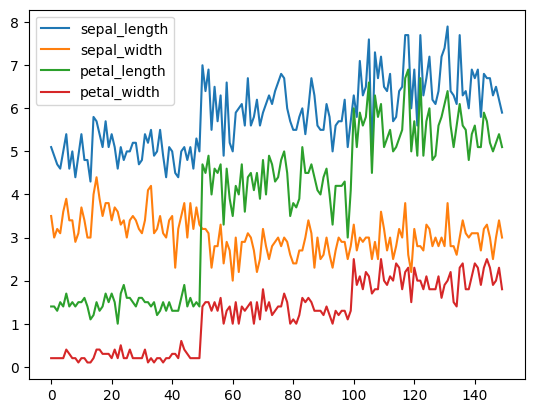

In [ ]:
iris_data.plot();

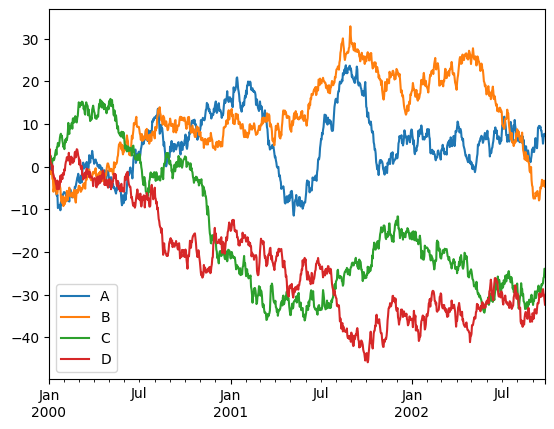

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()
plt.show()

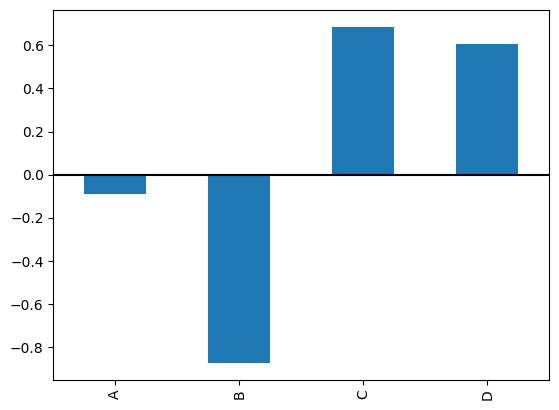

In [ ]:
plt.figure()
df.iloc[5].plot(kind='bar')
plt.axhline(0, color='k')

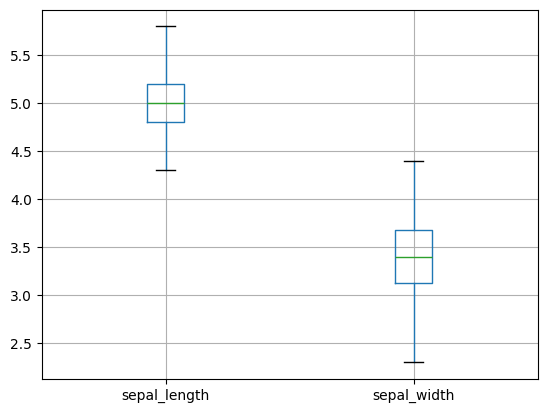

In [ ]:
ax = iris_data.groupby('species').get_group('setosa').boxplot(column=['sepal_length','sepal_width'], return_type='axes')